In [10]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error

In [ ]:

# Пример загрузки данных в DataFrame
data = pd.read_csv('../data/processed_data.csv')
data['date'] = pd.to_datetime(data['date'])

store_id = 'STORE_2'
art = '_085'
df=data[(data.item_id==store_id + art) & (data.store_id==store_id)]
df.set_index('date', inplace=True)
df.head()

In [16]:
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'cnt': 'y'})

num_days = 90
train = df_prophet.iloc[:-num_days]
test = df_prophet.iloc[-num_days:]
train.head()

,ds,wm_yr_wk,weekday,wday,month,year,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3,item_id,store_id,y,sell_price
0,2011-01-29,11101,Saturday,1,1,2011,1,0,0,0,STORE_2_085,STORE_2,3,1.0
1,2011-01-30,11101,Sunday,2,1,2011,2,0,0,0,STORE_2_085,STORE_2,8,1.0
2,2011-01-31,11101,Monday,3,1,2011,3,0,0,0,STORE_2_085,STORE_2,0,1.0
3,2011-02-01,11101,Tuesday,4,2,2011,4,0,1,1,STORE_2_085,STORE_2,3,1.0
4,2011-02-02,11101,Wednesday,5,2,2011,5,1,1,0,STORE_2_085,STORE_2,0,1.0


In [17]:
model = Prophet()
model.fit(train)

future = model.make_future_dataframe(periods=num_days)

# Выполнение прогноза
forecast = model.predict(future)
forecast.head()

21:34:13 - cmdstanpy - INFO - Chain [1] start processing
21:34:13 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-29,2.796133,-0.332842,9.159413,2.796133,2.796133,1.629332,1.629332,1.629332,1.222606,1.222606,1.222606,0.406726,0.406726,0.406726,0.0,0.0,0.0,4.425464
1,2011-01-30,2.811893,-0.914173,8.878037,2.811893,2.811893,1.081879,1.081879,1.081879,0.692692,0.692692,0.692692,0.389187,0.389187,0.389187,0.0,0.0,0.0,3.893772
2,2011-01-31,2.827653,-2.444498,7.472021,2.827653,2.827653,-0.280276,-0.280276,-0.280276,-0.663191,-0.663191,-0.663191,0.382915,0.382915,0.382915,0.0,0.0,0.0,2.547377
3,2011-02-01,2.843413,-1.900997,7.480374,2.843413,2.843413,-0.006439,-0.006439,-0.006439,-0.395535,-0.395535,-0.395535,0.389096,0.389096,0.389096,0.0,0.0,0.0,2.836974
4,2011-02-02,2.859173,-2.120823,7.694527,2.859173,2.859173,-0.120255,-0.120255,-0.120255,-0.528746,-0.528746,-0.528746,0.408491,0.408491,0.408491,0.0,0.0,0.0,2.738918


MAE: 4.32


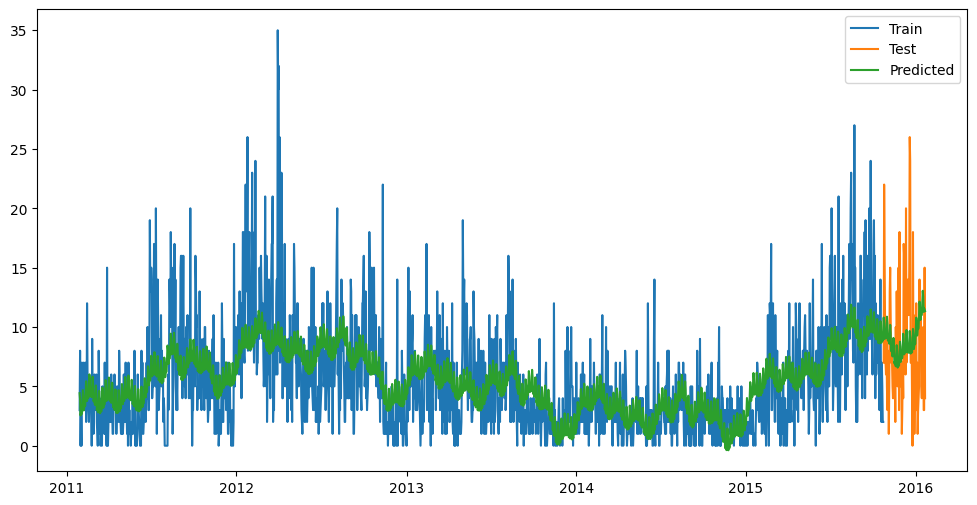

In [18]:
test_forecast = forecast.set_index('ds').loc[test['ds'], 'yhat']

mae = mean_absolute_error(test['y'], test_forecast)
print(f'MAE: {mae:.2f}')

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
# plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.legend()
plt.show()